In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bike = pd.read_csv("../2012.csv",
                      index_col="Date", 
                      parse_dates=True, dayfirst=True)

In [3]:
df_sbike = df_bike[["Berri 1", "Côte-Sainte-Catherine", 
                    "Maisonneuve 1"]].copy()

這裡的結尾多個神秘的 `.copy()` 是什麼意思呢? 這是說我們想要把 `df_sbike` 從原本所有的資料中 copy 出一個新的 DataFrame, 而不是只在原來的 DataFrame 取出一部份工作。這樣我們對 `df_sbkie` 的修改都不會影響到原來的東西。

其實沒有這麼做也不會怎樣, 只是會得到一個叫 SettingWithCopyWarning 的警告。

In [4]:
df_sbike.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-02,83,1,68
2012-01-03,135,2,104
2012-01-04,144,1,116
2012-01-05,197,2,124


#### 三條路線畫圖比較

In [5]:
df_sbike.plot()

然後我們可以做各種分析。

#### [Q1] 哪條路線最受歡迎?

In [6]:
df_sbike.mean()

Berri 1                  2985.048387
Côte-Sainte-Catherine    1233.351613
Maisonneuve 1            1983.325806
dtype: float64

看中位數、畫個圖也不錯。

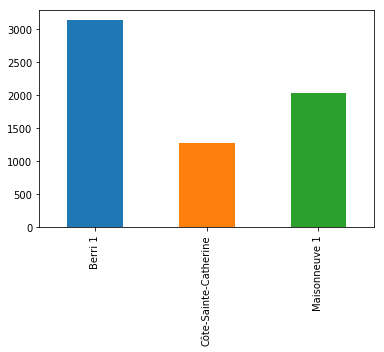

In [7]:
df_sbike.median().plot(kind="bar")

#### [Q2] 哪些是最可怕的日子 (沒什麼人在騎單車)?

In [8]:
df_sbike['Berri 1']<75

Date
2012-01-01     True
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-07    False
2012-01-08    False
2012-01-09    False
2012-01-10    False
2012-01-11    False
2012-01-12    False
2012-01-13    False
2012-01-14     True
2012-01-15     True
2012-01-16    False
2012-01-17    False
2012-01-18    False
2012-01-19    False
2012-01-20    False
2012-01-21     True
2012-01-22     True
2012-01-23    False
2012-01-24    False
2012-01-25    False
2012-01-26    False
2012-01-27    False
2012-01-28    False
2012-01-29    False
2012-01-30    False
              ...  
2012-10-07    False
2012-10-08    False
2012-10-09    False
2012-10-10    False
2012-10-11    False
2012-10-12    False
2012-10-13    False
2012-10-14    False
2012-10-15    False
2012-10-16    False
2012-10-17    False
2012-10-18    False
2012-10-19    False
2012-10-20    False
2012-10-21    False
2012-10-22    False
2012-10-23    False
2012-10-24    False
2012-10-25    F

In [9]:
df_sbike[df_sbike['Berri 1']<75]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-14,32,0,54
2012-01-15,54,0,33
2012-01-21,53,0,47
2012-01-22,71,0,41
2012-02-05,72,0,46
2012-02-11,71,0,63
2012-02-25,62,0,48


#### [Q3] 大家都是週末還是平日騎車呢?

In [10]:
df_sbike["weekday"] = df_sbike.index.weekday

In [11]:
df_sbike.tail()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday
Date,,,,
2012-11-01,2405,1208,1701,3
2012-11-02,1582,737,1109,4
2012-11-03,844,380,612,5
2012-11-04,966,446,710,6
2012-11-05,2247,1170,1705,0


In [12]:
counts_by_day = df_sbike.groupby("weekday").aggregate(sum)

In [13]:
counts_by_day

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
weekday,,,
0,134298,60329,90051
1,135305,58708,92035
2,152972,67344,104891
3,160131,69028,111895
4,141771,56446,98568
5,101578,34018,62067
6,99310,36466,55324


#### 修改 index

我們準備畫出大家最愛在哪些天騎車, 我們當然不想用 0, 1, 2, ... 代表星期幾, 於是我們把這些都換成「人話」。

In [14]:
counts_by_day.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [15]:
counts_by_day

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Mon,134298,60329,90051
Tue,135305,58708,92035
Wed,152972,67344,104891
Thu,160131,69028,111895
Fri,141771,56446,98568
Sat,101578,34018,62067
Sun,99310,36466,55324


然後我們來畫畫 Berri 1 這條線大家使用情況:

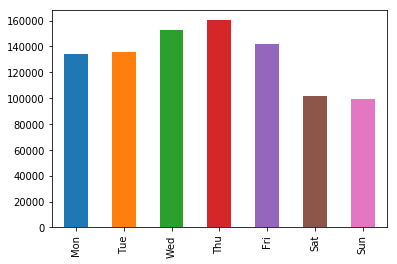

In [16]:
counts_by_day["Berri 1"].plot(kind='bar')

#### [Q4] 冷暖會不會影響騎車意願?

In [17]:
df_weather = pd.read_csv("../weather_2012.csv", 
                         index_col="Date/Time", 
                         parse_dates=True)

In [18]:
df_weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


我要一天的平均溫度!!

In [19]:
#resample('D'):以天為採樣頻率
df_sbike["mean temp"] = df_weather["Temp (C)"].resample('D').apply(np.mean)

In [20]:
df_sbike.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp
Date,,,,,
2012-01-01,35,0,38,6,0.629167
2012-01-02,83,1,68,0,0.041667
2012-01-03,135,2,104,1,-14.416667
2012-01-04,144,1,116,2,-13.645833
2012-01-05,197,2,124,3,-6.750000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BEFBF7DD8>,
      dtype=object)

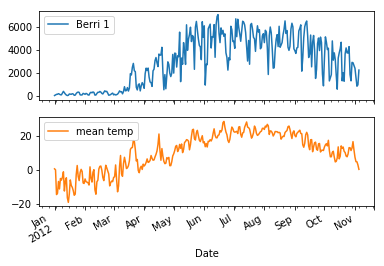

In [21]:
df_sbike[["Berri 1", "mean temp"]].plot(subplots=True)

#### [Q5] 下雨天就不騎車了吧?

In [22]:
df_sbike["Rain"] = df_weather["Weather"].str.contains("Rain").resample("D").apply(np.mean)

In [23]:
df_sbike.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp,Rain
Date,,,,,,
2012-01-01,35,0,38,6,0.629167,0.125000
2012-01-02,83,1,68,0,0.041667,0.041667
2012-01-03,135,2,104,1,-14.416667,0.000000
2012-01-04,144,1,116,2,-13.645833,0.000000
2012-01-05,197,2,124,3,-6.750000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BEFD68B70>,
      dtype=object)

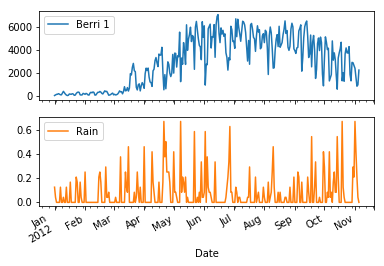

In [24]:
df_sbike[["Berri 1", "Rain"]].plot(subplots=True)